<a href="https://colab.research.google.com/github/ereshmittal/Colab-Gymnasium-Setup/blob/main/Gymnasium_RL_Setups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mario

Train an agent to play mario

In [ ]:
%%capture

#use gpu for training
#necessary dependencies

#remove " > /dev/null 2>&1" to see what is going on under the hood
!apt-get update > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install nes_py

!pip install --upgrade AutoROM
!AutoROM --accept-license
!pip install gymnasium

!pip install git+https://github.com/DLR-RM/stable-baselines3@feat/gymnasium-support
!pip install git+https://github.com/Stable-Baselines-Team/stable-baselines3-contrib@feat/gymnasium-support

In [ ]:
#imports

import gymnasium as gym
from gymnasium import envs
from gymnasium import logger as gymlogger
from gymnasium.experimental.wrappers import RecordVideoV0
from gymnasium.wrappers import GrayScaleObservation

# import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
# from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

import torch

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
from base64 import b64encode

import cv2
import os

In [ ]:
display = Display(visible=0, size=(240, 256))
display.start()

In [ ]:
env = gym.make("ALE/MarioBros-v5", render_mode='rgb_array')

In [ ]:
env = RecordVideoV0(env, '/content/')

In [ ]:
frameSize = (256, 240)
obs, info = env.reset()


terminated = True
for step in range(1000):
  if terminated:
    env.reset()
  observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
  env.render()

env.close()

In [ ]:
def show_video(path):
  compressed_path = path.rstrip('.mp4') + '_compressed' + '.mp4'
  os.system(f"ffmpeg -i {path} -vcodec libx264 {compressed_path}")
  mp4 = open(compressed_path,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width=400 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url)

In [ ]:
show_video('/content/rl-video-episode-0.mp4')

In [ ]:
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from stable_baselines3.common.env_util import make_atari_env, make_vec_env

In [ ]:
env = gym.make("ALE/MarioBros-v5", render_mode='rgb_array')

env = GrayScaleObservation(env, keep_dim=True)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
obs = env.reset()
obs.shape

(1, 210, 160, 4)

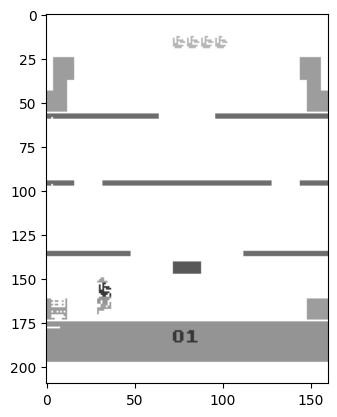

In [ ]:
plt.imshow(obs[0])
plt.show()

In [ ]:
observation, reward, done, info=env.step([env.action_space.sample()])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

In [ ]:
log_dir = "/content/"

In [ ]:
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log= log_dir, learning_rate=1e-5, n_steps=512) #use gpu

Using cpu device
Wrapping the env in a VecTransposeImage.


In [ ]:
model.learn(total_timesteps=100000)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Logging to /content/PPO_1
----------------------------
| time/              |     |
|    fps             | 60  |
|    iterations      | 1   |
|    time_elapsed    | 8   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 13            |
|    iterations           | 2             |
|    time_elapsed         | 75            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 0.00023569434 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -2.89         |
|    explained_variance   | -3.2          |
|    learning_rate        | 1e-05         |
|    loss                 | 0.000577      |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.00194      |
|    value_loss           | 0.00077       |
-----------------------

KeyboardInterrupt: ignored

In [ ]:
#use the same loop as training to evaluate the agent and record the frames

#VizDoom

Train an agent to play Doom

In [ ]:
%%bash

#ZDoom dependencies

# Install deps from 
# https://github.com/mwydmuch/ViZDoom/blob/master/doc/Building.md#-linux

apt-get install build-essential zlib1g-dev libsdl2-dev libjpeg-dev \
nasm tar libbz2-dev libgtk2.0-dev cmake git libfluidsynth-dev libgme-dev \
libopenal-dev timidity libwildmidi-dev unzip

# Boost libraries
apt-get install libboost-all-dev

# Lua binding dependencies
apt-get install liblua5.1-dev

In [ ]:
%%capture

!apt-get update > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install nes_py
!pip install gymnasium
!pip install git+https://github.com/DLR-RM/stable-baselines3@feat/gymnasium-support
!pip install git+https://github.com/Stable-Baselines-Team/stable-baselines3-contrib@feat/gymnasium-support
!pip install vizdoom

!git clone https://github.com/Farama-Foundation/ViZDoom

In [ ]:
import gymnasium as gym
from gymnasium import Env
from gymnasium import spaces
from gymnasium import envs
from gymnasium import logger as gymlogger
from gymnasium.experimental.wrappers import RecordVideoV0
from gymnasium.wrappers import GrayScaleObservation

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
from base64 import b64encode

import cv2
import os

from vizdoom import *
from vizdoom import DoomGame
import random
import time

In [ ]:
display = Display(visible=0, size=(240, 256))
display.start()

In [ ]:
game = DoomGame()
game.load_config('/content/ViZDoom/scenarios/basic.cfg')
game.init()

In [ ]:
actions = np.identity(3)
game.make_action(random.choice(actions))

In [ ]:
game.get_state().screen_buffer.shape

In [ ]:
## random actions with VizDoom

episodes = 10
for episode in range(episodes):
  game.new_episode()
  while not game.is_episode_finished():
    state = game.get_state()
    img = state.screen_buffer
    img = img[0]
    plt.imshow(img)
    plt.show()
    info = state.game_variables
    reward = game.make_action(random.choice(actions))
    print("reward: ", reward)
    time.sleep(0.02)
  print("result: ", game.get_total_reward())
  time.sleep(2)

In [ ]:
game.close()

In [ ]:
#build custom gymnasium environment

class VizDoomEnv(Env):

  metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 4}

  def __init__(self, render_mode=None, size=5, render = False):
    super().__init__()

    self.game = DoomGame()
    self.game.load_config('/content/ViZDoom/scenarios/basic.cfg')

    if render == False:
      self.game.set_window_visible(False)
    else:
      self.game.set_window_visible(True)
    
    self.game.init()

    self.observation_space = spaces.Box(low=0, high=255, shape=(100,160,1), dtype=np.uint8)
    self.action_space = spaces.Discrete(3)

    assert render_mode is None or render_mode in self.metadata["render_modes"]
    self.render_mode = render_mode

  def step(self, action):

    actions = np.identity(3, dtype=np.uint8)
    reward = self.game.make_action(actions[action], 4)

    if self.game.get_state():
      state = self.game.get_state().screen_buffer
      state = self.grayscale(state)
      ammo = self.game.get_state().game_variables[0]
      info = ammo
    else:
      state = np.zeros(self.game.observation_space.shape)
      info = 0

    info = {"info":info}
    terminated = self.game.is_episode_finished()

    return state, reward, terminated, False, info

  def render():
    pass
  def grayscale(self, obs):
    gray = cv2.cvtColor(np.moveaxis(obs, 0,-1), cv2.COLOR_BGR2GRAY)
    resize = cv2.resize(gray, (160, 100), interpolation=cv2.INTER_CUBIC)
    state = np.reshape(resize, (100,160,1))
    # gra
    return state

  def reset(self):

    self.game.new_episode()
    state = self.game.get_state().screen_buffer
    info = 0
    return self.grayscale(state), info

  def close(self):
    print("closing env...closed.")
    self.game.close()

In [ ]:
env = VizDoomEnv(render=True)

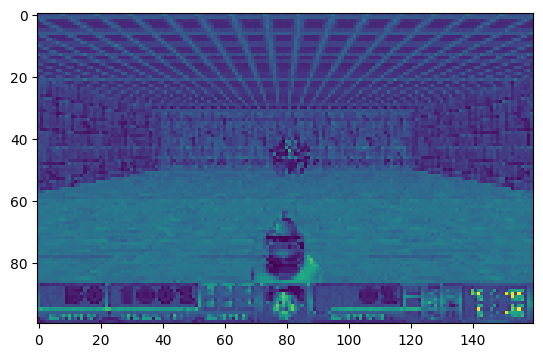

In [ ]:
obs, info = env.reset()
plt.imshow(obs)

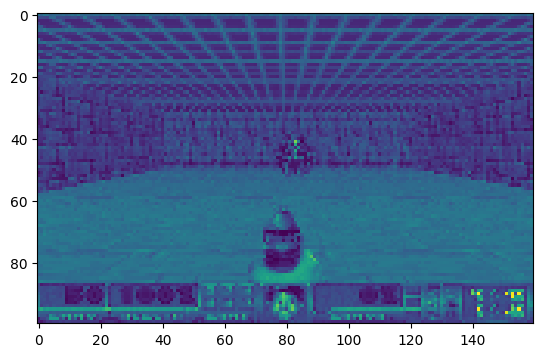

In [ ]:
obs, reward, terminated, truncated, info = env.step(0)
plt.imshow(obs)
plt.show()
# print(reward, terminated, truncated, info)

In [ ]:
env.close()

closing env...closed.


In [ ]:
from stable_baselines3.common import env_checker

In [ ]:
env_checker.check_env(env)

In [ ]:
#workflow similar to train an agent to play mario

In [ ]:
from stable_baselines3 import PPO

# Lunar Lander Continous

Continous action space makes it difficult to train

In [ ]:
%%capture
#remove " > /dev/null 2>&1" to see what is going on under the hood
!apt-get update > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install gymnasium[box2d]
!pip install git+https://github.com/DLR-RM/stable-baselines3@feat/gymnasium-support
!pip install git+https://github.com/Stable-Baselines-Team/stable-baselines3-contrib@feat/gymnasium-support

In [ ]:
import gymnasium as gym
from gymnasium import envs
from gymnasium import logger as gymlogger
from gymnasium.experimental.wrappers import RecordVideoV0
from gymnasium.wrappers import RecordVideo
from gymnasium.wrappers import GrayScaleObservation

import torch

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
from base64 import b64encode

import cv2
import os

In [ ]:
env = gym.make(
    "LunarLander-v2",
    continuous= True,
    gravity = -9.8,
    enable_wind =True,
    wind_power= 10.0,
    turbulence_power= 1.0,
    render_mode='rgb_array'
)

In [ ]:
env.action_space

Box(-1.0, 1.0, (2,), float32)

In [ ]:
env.observation_space

Box([-90.        -90.         -5.         -5.         -3.1415927  -5.
  -0.         -0.       ], [90.        90.         5.         5.         3.1415927  5.
  1.         1.       ], (8,), float32)

In [ ]:
def show_video(path):
  compressed_path = path.rstrip('.mp4') + '_compressed' + '.mp4'
  os.system(f"ffmpeg -i {path} -vcodec libx264 {compressed_path}")
  mp4 = open(compressed_path,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width=400 controls>
        <source src="%s" type="video/mp4">
  </video>
  """ % data_url)

In [ ]:
env = RecordVideoV0(env, '/content/')

/usr/local/lib/python3.9/dist-packages/gymnasium/experimental/wrappers/rendering.py:169: UserWarning: WARN: Overwriting existing videos at /content folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


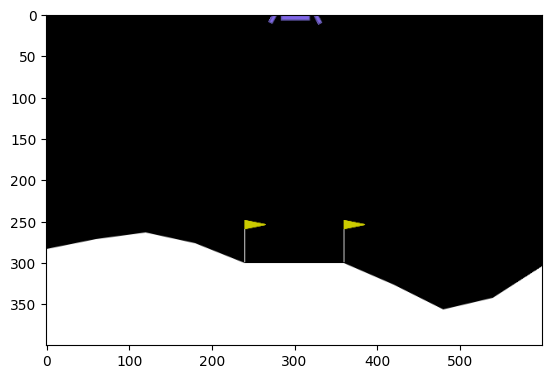

(400, 600, 3)


In [ ]:
env.reset()
screen=env.render()
plt.imshow(screen)
plt.show()
print(screen.shape)

In [ ]:
frameSize = (256, 256)
obs, info = env.reset()


terminated = True
for step in range(1000):
  if terminated:
    env.reset()
  observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
  env.render()

env.close()

Moviepy - Building video /content/rl-video-episode-0.mp4.
Moviepy - Writing video /content/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/rl-video-episode-0.mp4
Moviepy - Building video /content/rl-video-episode-1.mp4.
Moviepy - Writing video /content/rl-video-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /content/rl-video-episode-1.mp4
Moviepy - Building video /content/rl-video-episode-8.mp4.
Moviepy - Writing video /content/rl-video-episode-8.mp4



Moviepy - Done !
Moviepy - video ready /content/rl-video-episode-8.mp4


In [ ]:
show_video('/content/rl-video-episode-8.mp4')

In [ ]:
from stable_baselines3.common.vec_env import VecVideoRecorder, VecFrameStack, DummyVecEnv
from stable_baselines3.common.env_checker import check_env

In [ ]:
env = gym.make(
    "LunarLander-v2",
    continuous= True,
    gravity = -9.8,
    enable_wind =True,
    wind_power= 10.0,
    turbulence_power= 1.0,
    render_mode='rgb_array'
)

# env = RecordVideo(env, '/content/')
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')
# check_env(env)

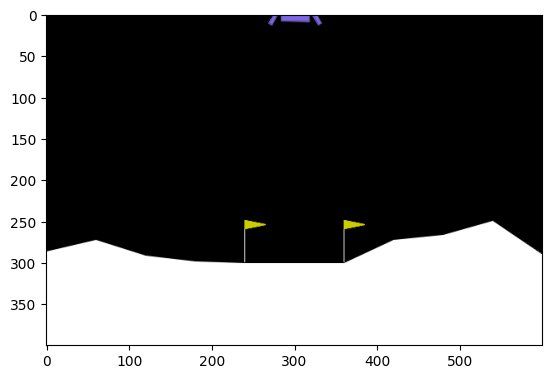

In [ ]:
env.reset()
plt.imshow(env.render())

In [ ]:
from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise

In [ ]:
n_actions = env.action_space.shape[-1]
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

model = DDPG("MlpPolicy", env, learning_rate=1e-5, action_noise=action_noise, verbose=1)

Using cuda device


In [ ]:
model.learn(total_timesteps=100000, log_interval=100)
model.save("llv2cont_pendulum")

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=100)

print(f"mean_reward:{mean_reward:.2f} +/- {std_reward:.2f}")

/usr/local/lib/python3.9/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward:-128.80 +/- 126.66


In [ ]:
eval_env = gym.make(
    "LunarLander-v2",
    continuous= True,
    gravity = -9.8,
    enable_wind =True,
    wind_power= 10.0,
    turbulence_power= 1.0,
    render_mode='rgb_array'
)

eval_env = RecordVideo(eval_env, '/content/')
eval_env = DummyVecEnv([lambda: eval_env])
# env = VecFrameStack(env, 4, channels_order='last')
# check_env(env)

In [ ]:
obs = eval_env.reset()
for i in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = eval_env.step(action)
    eval_env.render()

In [ ]:
show_video('/content/rl-video-episode-343.mp4')

# Streetfighter

gym-retro (out of maintanence), Non-commercial ROM, rendering problems

In [ ]:
%%capture
#remove " > /dev/null 2>&1" to see what is going on under the hood
!apt-get update > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1

# !pip install --upgrade AutoROM
# !AutoROM --accept-license
# !pip install gymnasium

# !pip install git+https://github.com/DLR-RM/stable-baselines3@feat/gymnasium-support
# !pip install git+https://github.com/Stable-Baselines-Team/stable-baselines3-contrib@feat/gymnasium-support

In [ ]:
!pip3 install git+https://github.com/MatPoliquin/stable-retro.git

In [ ]:
# import gymnasium as gym
# from gymnasium import envs
# from gymnasium import logger as gymlogger
# from gymnasium.experimental.wrappers import RecordVideoV0
# from gymnasium.wrappers import GrayScaleObservation

# import gym_super_mario_bros
# from nes_py.wrappers import JoypadSpace
# from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

import torch

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay
from pyvirtualdisplay import Display
from base64 import b64encode

import cv2
import os

In [ ]:
#importing retro to initialise said game using rom
import retro

In [ ]:
retro.data.list_games()

In [ ]:
!python3 -m retro.import "/content/ROM/"

Importing StreetFighterIISpecialChampionEdition-Genesis
Imported 1 games


In [ ]:
env.close()
env = retro.RetroEnv('StreetFighterIISpecialChampionEdition-Genesis', record='.')
env.reset()

GLException: ignored

In [ ]:
env.observation_space.sample()

In [ ]:
env.action_space.sample()

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int8)

In [ ]:
env.close()

In [ ]:
env.reset()

In [ ]:
env.render()